# Analysis of the maximum susceptibility $\chi_{max}$ for different ellipsoids

### Import the required modules

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from fatiando import utils
import mesher
import triaxial_ellipsoid, prolate_ellipsoid, oblate_ellipsoid

In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Target relative error $\epsilon$

In [19]:
Ne = 70
epsilon = np.linspace(0.01, 0.1, Ne)

### Triaxial model

In [20]:
# semi-axes (in m)
a0 = 1000.
b0 = 700.
c0 = 200.

# auxiliary variable
u = np.linspace(0., 10., 100)

# demagnetizing factors
n11_triaxial = []
n22_triaxial = []
n33_triaxial = []

for ui in u:
    a = a0 + ui*b0
    b = b0 + ui*b0
    c = c0 + ui*b0
    ellipsoid = mesher.TriaxialEllipsoid(0, 0, 0, a, b, c, 10, 10, 10)
    N1, N2, N3 = triaxial_ellipsoid.demag_factors(ellipsoid)
    n11_triaxial.append(N1)
    n22_triaxial.append(N2)
    n33_triaxial.append(N3)

In [21]:
n33_triaxial = np.array(n33_triaxial)

## Prolate

In [22]:
# semi-axes (in m)
b0 = 1000.
m = np.linspace(1.02, 10., 100)
a = b0*m

# demagnetizing factors
n11_prolate = []
n22_prolate = []

for ai in a:
    ellipsoid = mesher.ProlateEllipsoid(0, 0, 0, ai, b0, 10, 10, 10)
    N1, N2 = prolate_ellipsoid.demag_factors(ellipsoid)
    n11_prolate.append(N1)
    n22_prolate.append(N2)

In [23]:
n22_prolate = np.array(n22_prolate)

## Oblate

In [24]:
# semi-axes (in m)
b0 = 1000.
m_oblate = np.linspace(0.02, 0.98, 100)
a = b0*m_oblate

# demagnetizing factors
n11_oblate = []
n22_oblate = []

for ai in a:
    ellipsoid = mesher.ProlateEllipsoid(0, 0, 0, b0, ai, 10, 10, 10)
    N1, N2 = oblate_ellipsoid.demag_factors(ellipsoid)
    n11_oblate.append(N1)
    n22_oblate.append(N2)

In [25]:
n11_oblate = np.array(n11_oblate)

## Plot the results

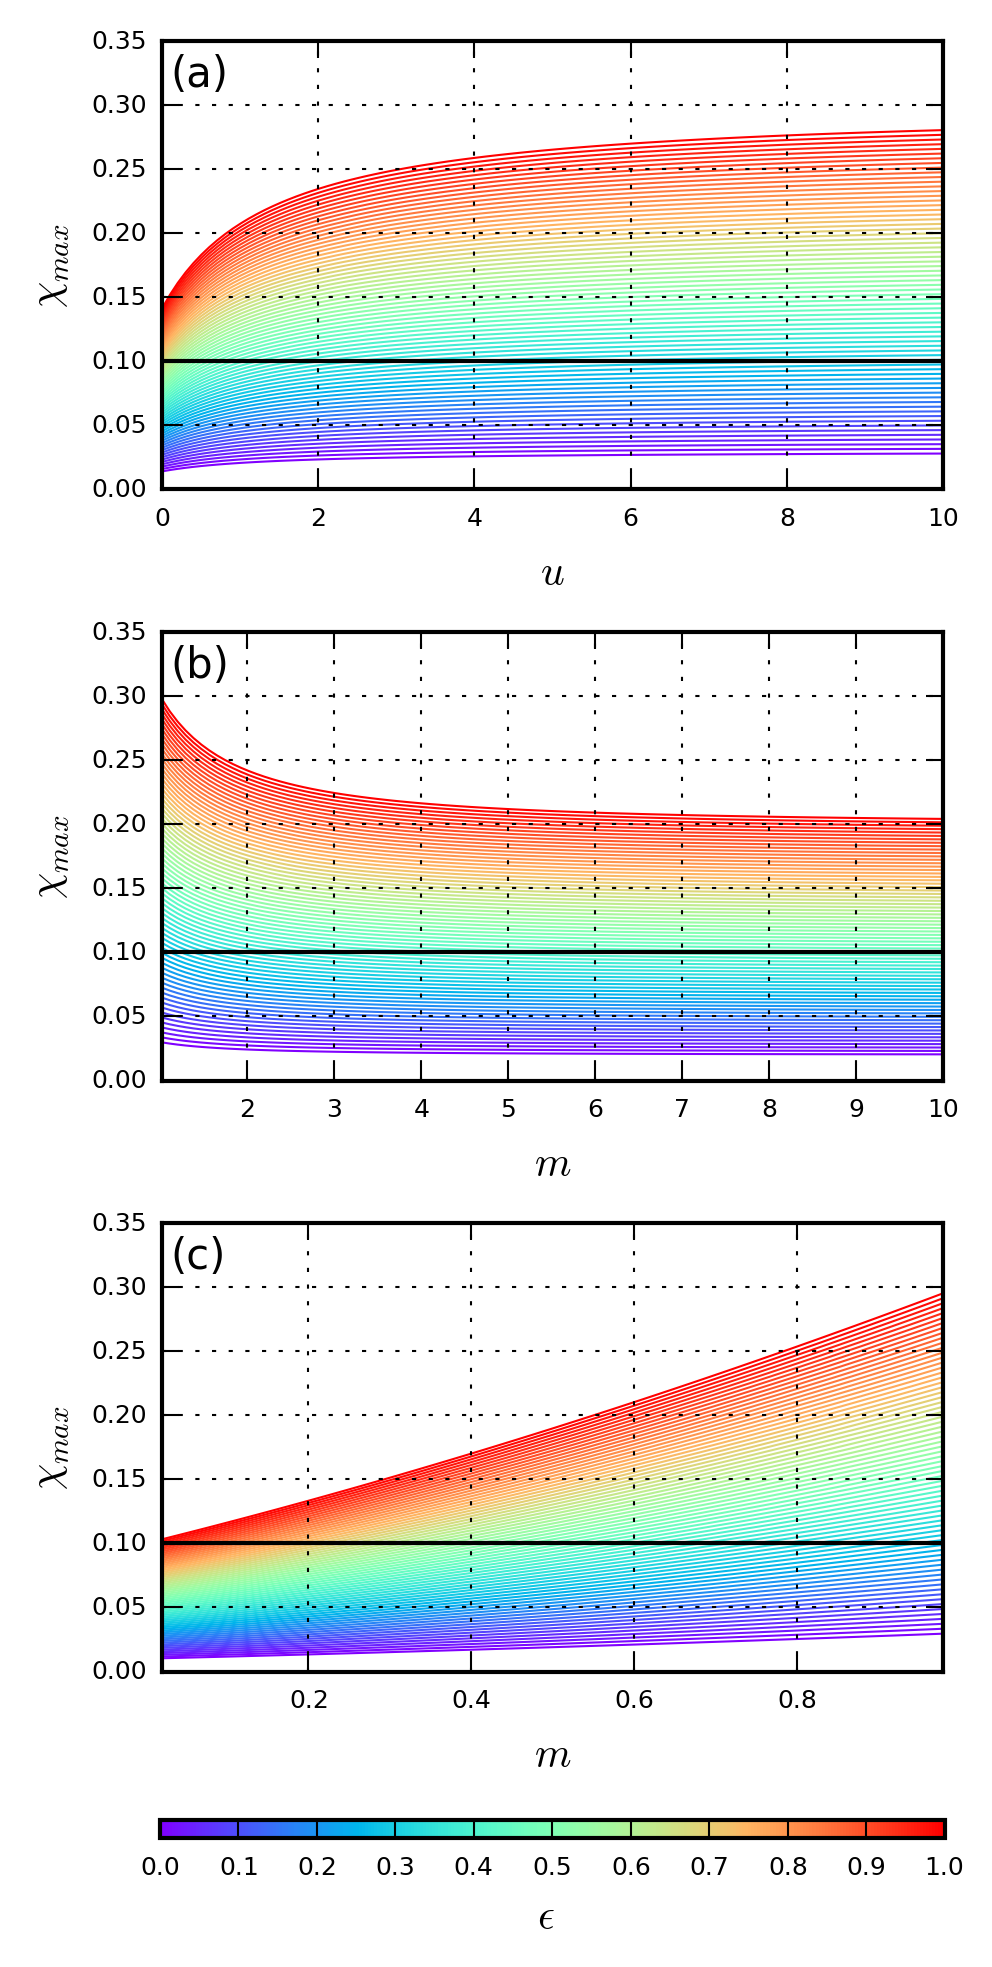

In [26]:
epsilon_norm = np.linspace(0., 1., Ne)

label_fontsize = 10
label_tex_fontsize = 10

norm = Normalize(vmin = 0, vmax = 1)

fig = plt.figure(figsize=(3.27, 6))

label_fontsize = 10
cb_x0 = 0.99
cb_width = 0.02
cb_aspect = 0.24
cb_space = 0.02

# Set the line colors
colors = get_cmap('rainbow')

plt.subplot(3, 1, 1)

for e, enorm in zip(epsilon, epsilon_norm):
    plt.plot(u, e/n33_triaxial, '-k', linewidth=0.5, color=colors(enorm))

#ax = fig.add_axes([cb_x0, , cb_width, cb_aspect], adjustable='box-forced')
#cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

plt.plot([u.min(), u.max()], [0.1, 0.1], '-k')

plt.annotate(s='(a)', xy=(0.015,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
#plt.annotate('$\epsilon$', xy = (1.05, 0.03), xycoords = 'axes fraction',
#             fontsize=10)

plt.ylabel('$\chi_{max}$', fontsize=10)
plt.xlabel('$u$', fontsize=label_tex_fontsize)
plt.xlim(u.min(), u.max())
plt.ylim(0., 0.35)
plt.grid()

plt.subplot(3, 1, 2)

for e, enorm in zip(epsilon, epsilon_norm):
    plt.plot(m, e/n22_prolate, '-k', linewidth=0.5, color=colors(enorm))
plt.plot([m.min(), m.max()], [0.1, 0.1], '-k')
plt.ylabel('$\chi_{max}$', fontsize=10)
plt.xlabel('$m$', fontsize=label_tex_fontsize)
plt.xlim(m.min(), m.max())
plt.ylim(0., 0.35)
plt.grid()
plt.annotate(s='(b)', xy=(0.015,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
#plt.annotate('$\epsilon$', xy = (1.05, 0.03), xycoords = 'axes fraction',
#             fontsize=10)

#ax = fig.add_axes([cb_x0, 0.16 + (cb_aspect + cb_space), cb_width, cb_aspect], adjustable='box-forced')
#cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

plt.subplot(3, 1, 3)

for e, enorm in zip(epsilon, epsilon_norm):
    plt.plot(m_oblate, e/n11_oblate, '-k', linewidth=0.5, color=colors(enorm))
plt.plot([m_oblate.min(), m_oblate.max()], [0.1, 0.1], '-k')
plt.ylabel('$\chi_{max}$', fontsize=10)
plt.xlabel('$m$', fontsize=label_tex_fontsize)
plt.xlim(m_oblate.min(), m_oblate.max())
plt.ylim(0., 0.35)
plt.grid()
plt.annotate(s='(c)', xy=(0.015,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)

ax = fig.add_axes([0.16, -0.02, 0.8, 0.01], adjustable='box')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'horizontal')
plt.annotate('$\epsilon$', xy = (0.48, -6.0), xycoords = 'axes fraction',
             fontsize=10)


plt.tight_layout()
#plt.savefig('..\\manuscript\\figures\\chi_triaxial.pdf', facecolor='w', bbox_inches='tight')
plt.show()